In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns 
color = sns.color_palette()

import numpy as np
import pandas as pd 

In [3]:
data = pd.read_csv('E:/ML-Lab/ml project/classification/dataset/healthcare-dataset-stroke-data.csv')

data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.shape

(5110, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
data = data.drop(columns=['id'])

In [8]:
data.dropna(inplace=True)


missing_values = data.isnull().sum()
print(missing_values)


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [9]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [10]:
numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])
numeric_cols.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
5,81.0,0,0,186.21,29.0,1


In [11]:
non_numeric_cols.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
5,Male,Yes,Private,Urban,formerly smoked


In [12]:
numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])

numeric_cols.fillna(numeric_cols.mean(), inplace=True)   

data = pd.concat([numeric_cols, non_numeric_cols], axis=1)

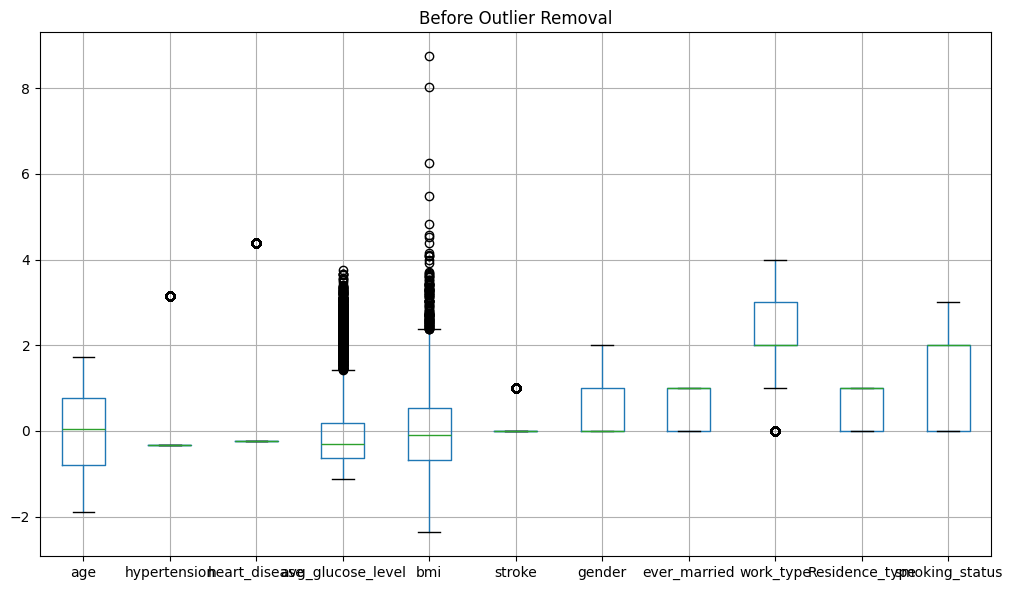

In [33]:
numeric_cols = data.select_dtypes(include=[np.number])

Q1 = numeric_cols.quantile(0.35)
Q3 = numeric_cols.quantile(0.65)
IQR = Q3 - Q1

data_cleaned = data[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
numeric_cols.boxplot()
plt.title("Before Outlier Removal")
plt.tight_layout()
plt.show()

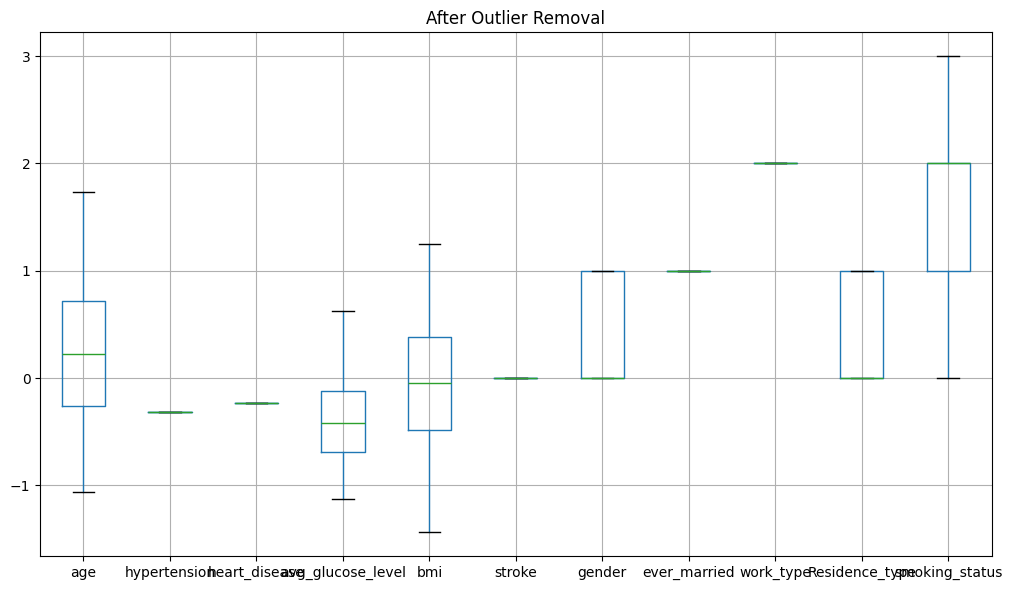

In [34]:
plt.figure(figsize=(20, 6))


plt.subplot(1, 2, 2)
data_cleaned.select_dtypes(include=[np.number]).boxplot()
plt.title("After Outlier Removal")

plt.tight_layout()
plt.show()


In [15]:
data_cleaned.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
249,3.0,0,0,95.12,18.0,0,Male,No,children,Rural,Unknown
251,8.0,0,0,110.89,17.6,0,Female,No,Private,Urban,Unknown
252,70.0,0,0,69.04,35.9,0,Female,Yes,Private,Rural,formerly smoked
255,52.0,0,0,77.59,17.7,0,Female,Yes,Private,Urban,formerly smoked
257,32.0,0,0,77.67,32.3,0,Female,Yes,Private,Rural,smokes


In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])


scaler = MinMaxScaler()
scaled_numeric_data = scaler.fit_transform(numeric_cols)
scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols.columns)
scaled_data = pd.concat([scaled_numeric_df, non_numeric_cols.reset_index(drop=True)], axis=1)

print(scaled_data.shape)
print()
print('*' * 60)
scaled_data.head()

(4909, 11)

************************************************************


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,work_type,Residence_type,smoking_status
0,0.816895,0.0,1.0,0.801265,0.301260,1.0,Male,Yes,Private,Urban,formerly smoked
1,0.975586,0.0,1.0,0.234512,0.254296,1.0,Male,Yes,Private,Rural,never smoked
2,0.597168,0.0,0.0,0.536008,0.276060,1.0,Female,Yes,Private,Urban,smokes
3,0.963379,1.0,0.0,0.549349,0.156930,1.0,Female,Yes,Self-employed,Rural,never smoked
4,0.987793,0.0,0.0,0.605161,0.214204,1.0,Male,Yes,Private,Urban,formerly smoked


In [17]:
data.stroke.value_counts(True)

stroke
0    0.957425
1    0.042575
Name: proportion, dtype: float64

In [18]:
data.shape

(4909, 11)

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']


le_dict = {}
for feature in cat_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    le_dict[feature] = le 


scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features].values)


if data['stroke'].dtype != 'int64' and data['stroke'].dtype != 'bool':
    data['stroke'] = (data['stroke'] > 0.5).astype(int)


X = data.drop(columns=['stroke'])  
y = data['stroke']  


if y.dtype == 'O':
    le = LabelEncoder()
    y = le.fit_transform(y)

print(X.shape, y.shape)


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


data_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['stroke'])], axis=1)
data_resampled.head()


(4909, 10) (4909,)


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,ever_married,work_type,Residence_type,smoking_status,stroke
0,1.070138,-0.318067,4.381968,2.777698,0.981345,1,1,2,1,1,1
1,1.646563,-0.318067,4.381968,0.013842,0.459269,1,1,2,0,2,1
2,0.272012,-0.318067,-0.228208,1.484132,0.701207,0,1,2,1,3,1
3,1.602222,3.143994,-0.228208,1.549193,-0.623083,0,1,3,0,2,1
4,1.690903,-0.318067,-0.228208,1.821368,0.013595,1,1,2,1,1,1


In [20]:
data_resampled.stroke.value_counts(True)

stroke
1    0.5
0    0.5
Name: proportion, dtype: float64

In [21]:
data_resampled.shape

(9400, 11)

In [22]:
from sklearn.model_selection import train_test_split


X = data_resampled.drop('stroke', axis=1)
y = data_resampled['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6580, 10), (2820, 10), (6580,), (2820,))

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred = model.predict(X_test)

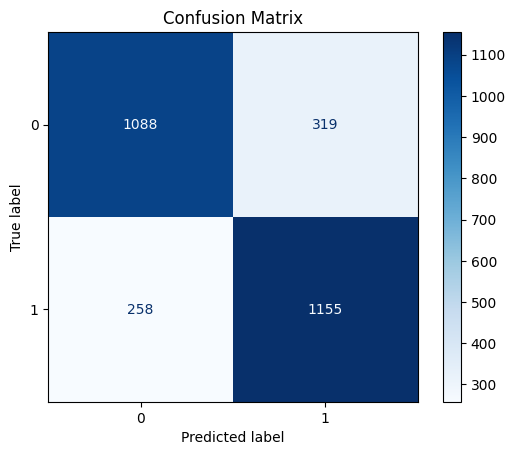

Precision: 0.7835820895522388
Recall: 0.8174097664543525
F1 Score: 0.800138552130239

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1407
           1       0.78      0.82      0.80      1413

    accuracy                           0.80      2820
   macro avg       0.80      0.80      0.80      2820
weighted avg       0.80      0.80      0.80      2820



In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

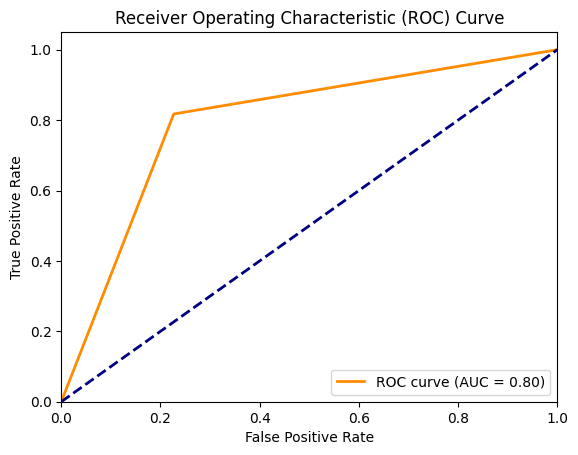

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [29]:
from joblib import dump, load
dump(model, 'classification_model.joblib')
print("Model saved successfully.")

Model saved successfully.


In [30]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from joblib import load
from sklearn.ensemble import RandomForestClassifier  
gender_data = ['Male', 'Female']  
worktype_data = ['Private', 'Self-employed', 'Govt_job']
evermarried_data = ['Yes', 'No']
residence_data = ['Urban', 'Rural']
smoking_data = ['never smoked', 'formerly smoked', 'Unknown', 'smokes'] 


gender_encoder = LabelEncoder()
gender_encoder.fit(gender_data)

evermarried_encoder = LabelEncoder()
evermarried_encoder.fit(evermarried_data)

worktype_encoder = LabelEncoder()
worktype_encoder.fit(worktype_data)

residence_encoder = LabelEncoder()
residence_encoder.fit(residence_data)

smoking_encoder = LabelEncoder()
smoking_encoder.fit(smoking_data)


dump(gender_encoder, 'gender_encoder.joblib')
dump(evermarried_encoder, 'evermarried_encoder.joblib')
dump(worktype_encoder, 'worktype_encoder.joblib')
dump(residence_encoder, 'residence_encoder.joblib')
dump(smoking_encoder, 'smoking_encoder.joblib')


gender_encoder = load('gender_encoder.joblib')
evermarried_encoder = load('evermarried_encoder.joblib')
worktype_encoder = load('worktype_encoder.joblib')
residence_encoder = load('residence_encoder.joblib')
smoking_encoder = load('smoking_encoder.joblib')

loaded_model = load('classification_model.joblib')


user_input = [[67.0, 0, 1,228.69, 36.6,  "Male", "Yes", "Private", "Urban", "formerly smoked"]]


user_input = np.array(user_input)

user_input[:, 5] = gender_encoder.transform(user_input[:, 5])  
user_input[:, 6] = evermarried_encoder.transform(user_input[:, 6])  
user_input[:, 7] = worktype_encoder.transform(user_input[:, 7])  
user_input[:, 8] = residence_encoder.transform(user_input[:, 8]) 
user_input[:, 9] = smoking_encoder.transform(user_input[:, 9]) 


user_input = user_input.astype(float)


prediction = loaded_model.predict(user_input)


print(f"Prediction: {prediction[0]} (1 = Positive, 0 = Negative)")


Prediction: 1 (1 = Positive, 0 = Negative)


C:\Users\bilal\anaconda3\envs\ml\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
